In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from consumption_saving import *

In [3]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [4]:
value_function_employment_HTM(model.par, model.par.w, 30 )

7.182202510023161

In [5]:
value_function_employment_ConSav(model.par, model.sol)
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[0,30,0]


(1, 44, 1)


7.218293979922774

In [6]:
unemployed_ss_HTM(model.par,0)

c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\Funcs.py:77: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\Funcs.py:78: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)
c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\Funcs.py:79: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[2] = (s/par.cost3)**(1/par.gamma)


(0.0, 2.5799769375723182e-20)

In [7]:
V_u, s = unemployment_ss_ConSav(model.par, -1, 0, 0)
print(V_u, s)

0.0 2.804773602774324e-20


In [8]:
search_effort_HTM = solve_search_effort_HTM(model.par)
print(np.shape(search_effort_HTM))


(1, 44)


In [9]:
solve_search_and_consumption_ConSav(model.par, model.sol)
search_effort_ConSav = model.sol.s[0,:,:]
search_effort_ConSav = search_effort_ConSav.T
print(np.shape(search_effort_ConSav))

(1, 44)


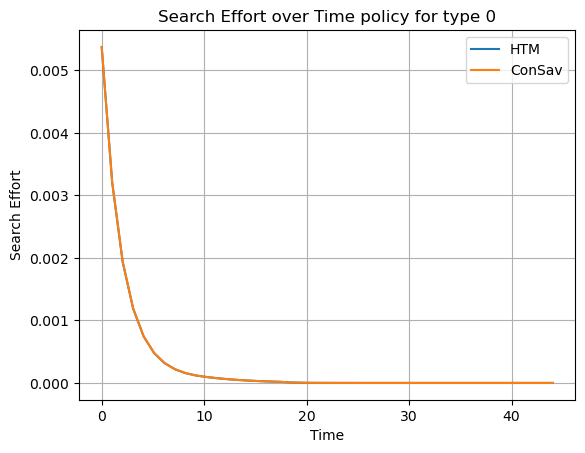

In [10]:

time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort_HTM[0,:], label = 'HTM') 
plt.plot(time, search_effort_ConSav[0,:], label = 'ConSav') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time policy for type 0')
plt.grid(True)
plt.legend()
plt.show()


In [11]:
sim_HTM = model.solve_HTM()

In [12]:
model.solve_ConSav()
sim_ConSav = model.sim.s_total

Text(0.5, 1.0, 'Search Effort over simulated for all types')

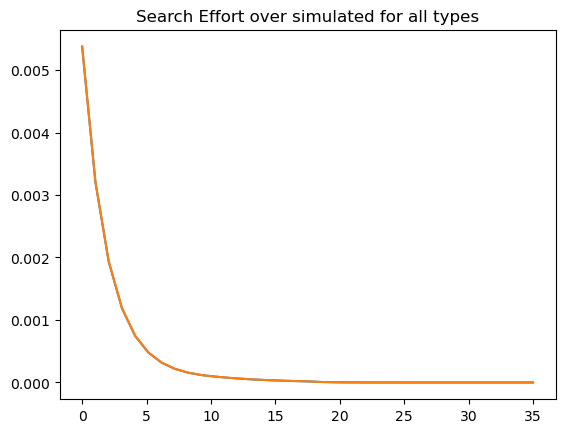

In [13]:
t_sim = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(t_sim, sim_HTM[:], label = 'HTM')
plt.plot(t_sim, sim_ConSav[:], label = 'ConSav')
plt.title('Search Effort over simulated for all types')